# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Input Data of Adani Enterprise

In [2]:
df=pd.read_csv('Quote-Equity-ADANIENT-EQ-12-04-2021-to-12-04-2023.csv')
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,12-Apr-2023,EQ,"1,814.00","1,858.75","1,797.05","1,803.15","1,848.00","1,847.25","1,840.31","4,190.00","1,017.45","4,809,035","8,850,122,661.80","162,125"
1,11-Apr-2023,EQ,"1,810.00","1,829.00","1,792.85","1,797.25","1,800.00","1,803.15","1,809.04","4,190.00","1,017.45","2,883,672","5,216,680,033.90","105,302"
2,10-Apr-2023,EQ,"1,774.00","1,812.70","1,760.60","1,754.05","1,797.00","1,797.25","1,792.77","4,190.00","1,017.45","4,197,975","7,526,019,234.05","175,216"
3,06-Apr-2023,EQ,"1,705.00","1,793.65","1,688.15","1,698.00","1,752.60","1,754.05","1,750.41","4,190.00","1,017.45","6,012,473","10,524,302,365.35","241,838"
4,05-Apr-2023,EQ,"1,717.45","1,737.95","1,671.55","1,717.45","1,701.50","1,698.00","1,700.22","4,190.00","1,017.45","3,690,559","6,274,770,522.45","153,045"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,19-Apr-2021,EQ,"1,100.00","1,153.00","1,089.00","1,159.00","1,134.00","1,136.35","1,130.34","1,251.60",127.30,"8,565,063","9,681,415,520.05","155,220"
493,16-Apr-2021,EQ,"1,130.00","1,192.00","1,112.00","1,129.95","1,156.40","1,159.00","1,163.18","1,251.60",127.30,"10,661,068","12,400,729,514.50","196,992"
494,15-Apr-2021,EQ,"1,095.00","1,144.90","1,081.35","1,106.35","1,124.00","1,129.95","1,118.21","1,251.60",127.30,"9,350,889","10,456,249,678.55","187,596"
495,13-Apr-2021,EQ,"1,077.00","1,116.30","1,051.05","1,074.40","1,102.00","1,106.35","1,091.81","1,251.60",127.30,"12,137,329","13,251,645,770.75","257,690"


In [3]:
df.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [4]:
df1=df.iloc[:,2:]
df2=df1.copy()
df2

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,"1,814.00","1,858.75","1,797.05","1,803.15","1,848.00","1,847.25","1,840.31","4,190.00","1,017.45","4,809,035","8,850,122,661.80","162,125"
1,"1,810.00","1,829.00","1,792.85","1,797.25","1,800.00","1,803.15","1,809.04","4,190.00","1,017.45","2,883,672","5,216,680,033.90","105,302"
2,"1,774.00","1,812.70","1,760.60","1,754.05","1,797.00","1,797.25","1,792.77","4,190.00","1,017.45","4,197,975","7,526,019,234.05","175,216"
3,"1,705.00","1,793.65","1,688.15","1,698.00","1,752.60","1,754.05","1,750.41","4,190.00","1,017.45","6,012,473","10,524,302,365.35","241,838"
4,"1,717.45","1,737.95","1,671.55","1,717.45","1,701.50","1,698.00","1,700.22","4,190.00","1,017.45","3,690,559","6,274,770,522.45","153,045"
...,...,...,...,...,...,...,...,...,...,...,...,...
492,"1,100.00","1,153.00","1,089.00","1,159.00","1,134.00","1,136.35","1,130.34","1,251.60",127.30,"8,565,063","9,681,415,520.05","155,220"
493,"1,130.00","1,192.00","1,112.00","1,129.95","1,156.40","1,159.00","1,163.18","1,251.60",127.30,"10,661,068","12,400,729,514.50","196,992"
494,"1,095.00","1,144.90","1,081.35","1,106.35","1,124.00","1,129.95","1,118.21","1,251.60",127.30,"9,350,889","10,456,249,678.55","187,596"
495,"1,077.00","1,116.30","1,051.05","1,074.40","1,102.00","1,106.35","1,091.81","1,251.60",127.30,"12,137,329","13,251,645,770.75","257,690"


# Changing dataset from String type to float type

In [5]:
df2.dtypes

OPEN             object
HIGH             object
LOW              object
PREV. CLOSE      object
ltp              object
close            object
vwap             object
52W H            object
52W L            object
VOLUME           object
VALUE            object
No of trades     object
dtype: object

In [6]:
df2.columns 

Index(['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ',
       '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades '],
      dtype='object')

In [7]:
for i in df2.columns:
    if(df2[i].dtype==object):
        df2[i]=df2[i].str.replace(',','').astype(float)
df2.dtypes

OPEN             float64
HIGH             float64
LOW              float64
PREV. CLOSE      float64
ltp              float64
close            float64
vwap             float64
52W H            float64
52W L            float64
VOLUME           float64
VALUE            float64
No of trades     float64
dtype: object

In [8]:
df2

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,1814.00,1858.75,1797.05,1803.15,1848.0,1847.25,1840.31,4190.0,1017.45,4809035.0,8.850123e+09,162125.0
1,1810.00,1829.00,1792.85,1797.25,1800.0,1803.15,1809.04,4190.0,1017.45,2883672.0,5.216680e+09,105302.0
2,1774.00,1812.70,1760.60,1754.05,1797.0,1797.25,1792.77,4190.0,1017.45,4197975.0,7.526019e+09,175216.0
3,1705.00,1793.65,1688.15,1698.00,1752.6,1754.05,1750.41,4190.0,1017.45,6012473.0,1.052430e+10,241838.0
4,1717.45,1737.95,1671.55,1717.45,1701.5,1698.00,1700.22,4190.0,1017.45,3690559.0,6.274771e+09,153045.0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,1100.00,1153.00,1089.00,1159.00,1134.0,1136.35,1130.34,1251.6,127.30,8565063.0,9.681416e+09,155220.0
493,1130.00,1192.00,1112.00,1129.95,1156.4,1159.00,1163.18,1251.6,127.30,10661068.0,1.240073e+10,196992.0
494,1095.00,1144.90,1081.35,1106.35,1124.0,1129.95,1118.21,1251.6,127.30,9350889.0,1.045625e+10,187596.0
495,1077.00,1116.30,1051.05,1074.40,1102.0,1106.35,1091.81,1251.6,127.30,12137329.0,1.325165e+10,257690.0


# Removing unnecessary columns

In [9]:
df3=df2.drop(columns=['close ','No of trades ','PREV. CLOSE ','ltp ','vwap ','52W H ','52W L '])
df3

,OPEN,HIGH,LOW,VOLUME,VALUE
0,1814.00,1858.75,1797.05,4809035.0,8.850123e+09
1,1810.00,1829.00,1792.85,2883672.0,5.216680e+09
2,1774.00,1812.70,1760.60,4197975.0,7.526019e+09
3,1705.00,1793.65,1688.15,6012473.0,1.052430e+10
4,1717.45,1737.95,1671.55,3690559.0,6.274771e+09
...,...,...,...,...,...
492,1100.00,1153.00,1089.00,8565063.0,9.681416e+09
493,1130.00,1192.00,1112.00,10661068.0,1.240073e+10
494,1095.00,1144.90,1081.35,9350889.0,1.045625e+10
495,1077.00,1116.30,1051.05,12137329.0,1.325165e+10


# df3,df4 is final dataset

In [10]:
df4=df2['close ']

In [11]:
df3

,OPEN,HIGH,LOW,VOLUME,VALUE
0,1814.00,1858.75,1797.05,4809035.0,8.850123e+09
1,1810.00,1829.00,1792.85,2883672.0,5.216680e+09
2,1774.00,1812.70,1760.60,4197975.0,7.526019e+09
3,1705.00,1793.65,1688.15,6012473.0,1.052430e+10
4,1717.45,1737.95,1671.55,3690559.0,6.274771e+09
...,...,...,...,...,...
492,1100.00,1153.00,1089.00,8565063.0,9.681416e+09
493,1130.00,1192.00,1112.00,10661068.0,1.240073e+10
494,1095.00,1144.90,1081.35,9350889.0,1.045625e+10
495,1077.00,1116.30,1051.05,12137329.0,1.325165e+10


# Normalisation

In [12]:
sc=StandardScaler()
df3=sc.fit_transform(df3)

# Splitting into training and validation datasets

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df3,df4,test_size=0.3,random_state=13)

# Linear regression

In [14]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred_lr=model_lr.predict(x_test)

In [16]:
print('Root Mean Square Error (Linear Regression):',mean_squared_error(y_true=y_test, y_pred=y_pred_lr, squared=False))
print('Mean Absolute Percentage Error (Linear Regression):',mean_absolute_percentage_error(y_test,y_pred_lr))
print('Mean Bias Error (Linear Regression):',np.mean(y_test - y_pred_lr))

Root Mean Square Error (Linear Regression): 32.565260118970606
Mean Absolute Percentage Error (Linear Regression): 0.008581348838055053
Mean Bias Error (Linear Regression): 4.383117556559219


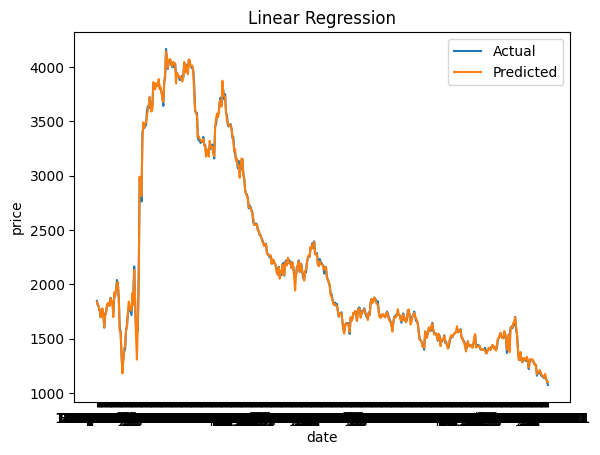

In [17]:
plt.plot(df['Date '],df2['close '],label='Actual')
plt.plot(df['Date '],model_lr.predict(df3),label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Random Forest Regressor

In [18]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
y_pred_rf=model_rf.predict(x_test)

In [20]:
print('Root Mean Square Error (Random Forest Regressor):',mean_squared_error(y_true=y_test, y_pred=y_pred_rf, squared=False))
print('Mean Absolute Percentage Error (Random Forest Regressor):',mean_absolute_percentage_error(y_test,y_pred_rf))
print('Mean Bias Error (Random Forest Regressor):',np.mean(y_test - y_pred_rf))

Root Mean Square Error (Random Forest Regressor): 32.12940475924424
Mean Absolute Percentage Error (Random Forest Regressor): 0.010829710331434242
Mean Bias Error (Random Forest Regressor): 0.16752000000012535


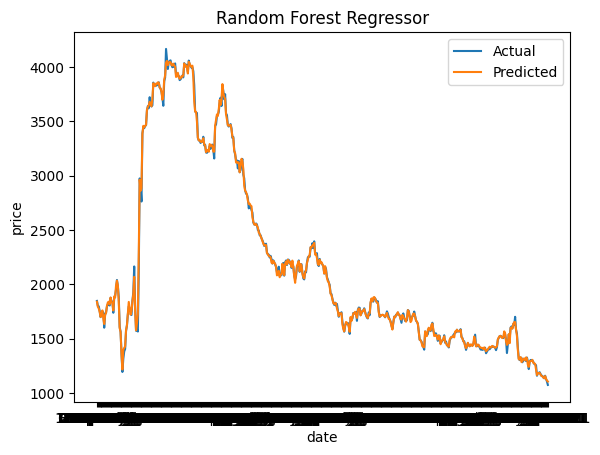

In [21]:
plt.plot(df['Date '],df2['close '],label='Actual')
plt.plot(df['Date '],model_rf.predict(df3),label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()

# ANN

In [91]:
model_ann = Sequential([
    Dense(units=5, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(units=5, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(units=3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [92]:
model_ann.compile(loss='mse',optimizer=Adam(learning_rate=0.1))

In [93]:
model_ann.fit(x_train, y_train, epochs=300,validation_data=(x_test,y_test))

Epoch 1/300
11/11 [==============================] - 2s 48ms/step - loss: 5384473.0000 - val_loss: 5317928.5000
Epoch 2/300
11/11 [==============================] - 0s 12ms/step - loss: 3676329.0000 - val_loss: 786400.3125
Epoch 3/300
11/11 [==============================] - 0s 13ms/step - loss: 1689662.3750 - val_loss: 868351.8125
Epoch 4/300
11/11 [==============================] - 0s 9ms/step - loss: 1420789.6250 - val_loss: 332766.6250
Epoch 5/300
11/11 [==============================] - 0s 12ms/step - loss: 1277899.3750 - val_loss: 304181.9062
Epoch 6/300
11/11 [==============================] - 0s 13ms/step - loss: 1238043.3750 - val_loss: 208366.4688
Epoch 7/300
11/11 [==============================] - 0s 13ms/step - loss: 1040116.0000 - val_loss: 396172.5000
Epoch 8/300
11/11 [==============================] - 0s 13ms/step - loss: 919703.6250 - val_loss: 212140.5000
Epoch 9/300
11/11 [==============================] - 0s 12ms/step - loss: 957634.9375 - val_loss: 294695.5625
Epo

11/11 [==============================] - 0s 13ms/step - loss: 662430.2500 - val_loss: 31189.2539
Epoch 76/300
11/11 [==============================] - 0s 13ms/step - loss: 597738.1250 - val_loss: 76906.6875
Epoch 77/300
11/11 [==============================] - 0s 13ms/step - loss: 505974.7188 - val_loss: 159170.4219
Epoch 78/300
11/11 [==============================] - 0s 13ms/step - loss: 789709.8125 - val_loss: 23760.3945
Epoch 79/300
11/11 [==============================] - 0s 13ms/step - loss: 554053.1875 - val_loss: 190484.2969
Epoch 80/300
11/11 [==============================] - 0s 13ms/step - loss: 655374.5000 - val_loss: 140903.8594
Epoch 81/300
11/11 [==============================] - 0s 13ms/step - loss: 597964.2500 - val_loss: 72430.6875
Epoch 82/300
11/11 [==============================] - 0s 14ms/step - loss: 680569.7500 - val_loss: 189553.3438
Epoch 83/300
11/11 [==============================] - 0s 11ms/step - loss: 688894.1875 - val_loss: 32193.5430
Epoch 84/300
11/11 

Epoch 149/300
11/11 [==============================] - 0s 13ms/step - loss: 443099.3750 - val_loss: 106890.1016
Epoch 150/300
11/11 [==============================] - 0s 11ms/step - loss: 597144.8750 - val_loss: 210486.6875
Epoch 151/300
11/11 [==============================] - 0s 12ms/step - loss: 540228.3125 - val_loss: 32821.1914
Epoch 152/300
11/11 [==============================] - 0s 11ms/step - loss: 568682.0625 - val_loss: 83639.6953
Epoch 153/300
11/11 [==============================] - 0s 13ms/step - loss: 583533.1875 - val_loss: 186451.7188
Epoch 154/300
11/11 [==============================] - 0s 12ms/step - loss: 570148.0625 - val_loss: 95661.9453
Epoch 155/300
11/11 [==============================] - 0s 13ms/step - loss: 608586.3125 - val_loss: 101336.6719
Epoch 156/300
11/11 [==============================] - 0s 12ms/step - loss: 479268.2500 - val_loss: 65470.7344
Epoch 157/300
11/11 [==============================] - 0s 12ms/step - loss: 562429.0625 - val_loss: 417229.5

11/11 [==============================] - 0s 9ms/step - loss: 510908.2500 - val_loss: 32049.2031
Epoch 223/300
11/11 [==============================] - 0s 13ms/step - loss: 496650.8750 - val_loss: 244047.4062
Epoch 224/300
11/11 [==============================] - 0s 13ms/step - loss: 527873.8750 - val_loss: 154238.1875
Epoch 225/300
11/11 [==============================] - 0s 13ms/step - loss: 583992.9375 - val_loss: 44327.0781
Epoch 226/300
11/11 [==============================] - 0s 14ms/step - loss: 493172.4688 - val_loss: 66225.7891
Epoch 227/300
11/11 [==============================] - 0s 13ms/step - loss: 524374.0000 - val_loss: 59095.1211
Epoch 228/300
11/11 [==============================] - 0s 14ms/step - loss: 442611.8750 - val_loss: 37043.2617
Epoch 229/300
11/11 [==============================] - 0s 14ms/step - loss: 512293.3438 - val_loss: 127590.6797
Epoch 230/300
11/11 [==============================] - 0s 12ms/step - loss: 587249.7500 - val_loss: 34932.7383
Epoch 231/300

11/11 [==============================] - 0s 12ms/step - loss: 508297.7188 - val_loss: 30694.1074
Epoch 296/300
11/11 [==============================] - 0s 13ms/step - loss: 412667.2188 - val_loss: 45628.7852
Epoch 297/300
11/11 [==============================] - 0s 12ms/step - loss: 483191.9375 - val_loss: 22648.5703
Epoch 298/300
11/11 [==============================] - 0s 13ms/step - loss: 513269.3438 - val_loss: 74738.4375
Epoch 299/300
11/11 [==============================] - 0s 13ms/step - loss: 411747.9688 - val_loss: 27471.0664
Epoch 300/300
11/11 [==============================] - 0s 12ms/step - loss: 487239.8750 - val_loss: 155469.6406


In [94]:
model_ann.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 155469.6406


155469.640625

In [95]:
y_pred_ann=model_ann.predict(x_test)

5/5 [==============================] - 0s 4ms/step


16/16 [==============================] - 0s 4ms/step


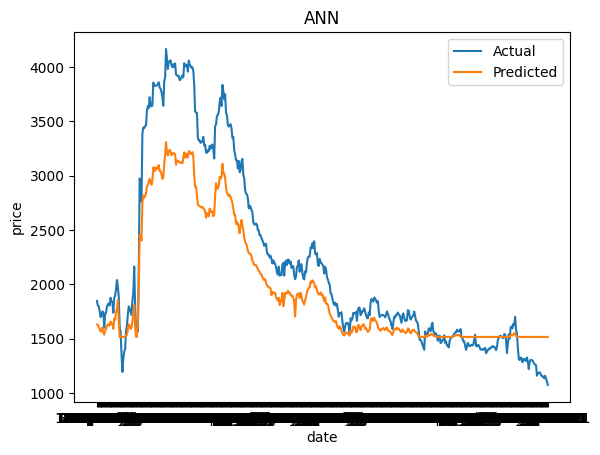

In [96]:
plt.plot(df['Date '],df2['close '],label='Actual')
plt.plot(df['Date '],model_ann.predict(df3),label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('ANN')
plt.legend()
plt.show()

In [53]:
m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(y_test,y_pred_ann)
rmse=m.result().numpy()

n = tf.keras.metrics.MeanAbsolutePercentageError()
n.update_state(y_test,y_pred_ann)
mape=n.result().numpy()


In [54]:
print('Root Mean Square Error (ANN):',rmse)
print('Mean Absolute Percentage Error (ANN):',mape)
print('Mean Bias Error (ANN):',np.mean(np.squeeze(y_test) - np.squeeze(y_pred_ann)))

Root Mean Square Error (ANN): 521.237
Mean Absolute Percentage Error (ANN): 15.914854
Mean Bias Error (ANN): 387.2321697591146


# ________________________________________________________________

# Testing Data of Adani Enterprise

In [55]:
out=pd.read_csv('Quote-Equity-ADANIENT-EQ-12-04-2023-to-21-04-2023(test).csv')
out

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,20-Apr-2023,EQ,"1,855.00","1,878.90","1,836.85","1,853.85","1,846.00","1,842.90","1,853.80","4,190.00","1,017.45","2,016,823","3,738,787,276.00","75,110"
1,19-Apr-2023,EQ,"1,847.00","1,877.70","1,835.00","1,850.95","1,851.00","1,853.85","1,857.49","4,190.00","1,017.45","2,455,884","4,561,782,022.40","95,034"
2,18-Apr-2023,EQ,"1,892.00","1,902.75","1,830.00","1,878.75","1,844.90","1,850.95","1,864.10","4,190.00","1,017.45","2,542,401","4,739,293,431.60","103,734"
3,17-Apr-2023,EQ,"1,870.75","1,904.90","1,847.00","1,870.75","1,878.45","1,878.75","1,877.52","4,190.00","1,017.45","2,983,032","5,600,695,388.35","121,123"
4,13-Apr-2023,EQ,"1,855.00","1,885.00","1,826.05","1,847.25","1,869.50","1,870.75","1,858.75","4,190.00","1,017.45","3,402,280","6,323,988,503.30","126,886"
5,12-Apr-2023,EQ,"1,814.00","1,858.75","1,797.05","1,803.15","1,848.00","1,847.25","1,840.31","4,190.00","1,017.45","4,809,035","8,850,122,661.80","162,125"


# Changing Dataset fron String type to Float type

In [56]:
out1=out.iloc[:,2:]
out2=out1.copy()
out2

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,"1,855.00","1,878.90","1,836.85","1,853.85","1,846.00","1,842.90","1,853.80","4,190.00","1,017.45","2,016,823","3,738,787,276.00","75,110"
1,"1,847.00","1,877.70","1,835.00","1,850.95","1,851.00","1,853.85","1,857.49","4,190.00","1,017.45","2,455,884","4,561,782,022.40","95,034"
2,"1,892.00","1,902.75","1,830.00","1,878.75","1,844.90","1,850.95","1,864.10","4,190.00","1,017.45","2,542,401","4,739,293,431.60","103,734"
3,"1,870.75","1,904.90","1,847.00","1,870.75","1,878.45","1,878.75","1,877.52","4,190.00","1,017.45","2,983,032","5,600,695,388.35","121,123"
4,"1,855.00","1,885.00","1,826.05","1,847.25","1,869.50","1,870.75","1,858.75","4,190.00","1,017.45","3,402,280","6,323,988,503.30","126,886"
5,"1,814.00","1,858.75","1,797.05","1,803.15","1,848.00","1,847.25","1,840.31","4,190.00","1,017.45","4,809,035","8,850,122,661.80","162,125"


In [57]:
for i in out2.columns:
    if(out2[i].dtype==object):
        out2[i]=out2[i].str.replace(',','').astype(float)
out2.dtypes

OPEN             float64
HIGH             float64
LOW              float64
PREV. CLOSE      float64
ltp              float64
close            float64
vwap             float64
52W H            float64
52W L            float64
VOLUME           float64
VALUE            float64
No of trades     float64
dtype: object

# Removing Unnecessary Columns

In [58]:
out3=out2.drop(columns=['close ','No of trades ','PREV. CLOSE ','ltp ','vwap ','52W H ','52W L '])
out3

,OPEN,HIGH,LOW,VOLUME,VALUE
0,1855.00,1878.90,1836.85,2016823.0,3.738787e+09
1,1847.00,1877.70,1835.00,2455884.0,4.561782e+09
2,1892.00,1902.75,1830.00,2542401.0,4.739293e+09
3,1870.75,1904.90,1847.00,2983032.0,5.600695e+09
4,1855.00,1885.00,1826.05,3402280.0,6.323989e+09
5,1814.00,1858.75,1797.05,4809035.0,8.850123e+09


In [59]:
out4=out2['close ']

In [60]:
out4

0    1842.90
1    1853.85
2    1850.95
3    1878.75
4    1870.75
5    1847.25
Name: close , dtype: float64

In [61]:
out3=sc.transform(out3)

# Linear Regression

In [62]:
pred=model_lr.predict(out3)
pred

array([1858.39685145, 1861.29845903, 1848.58192446, 1878.36663599,
       1855.31626314, 1837.22507563])

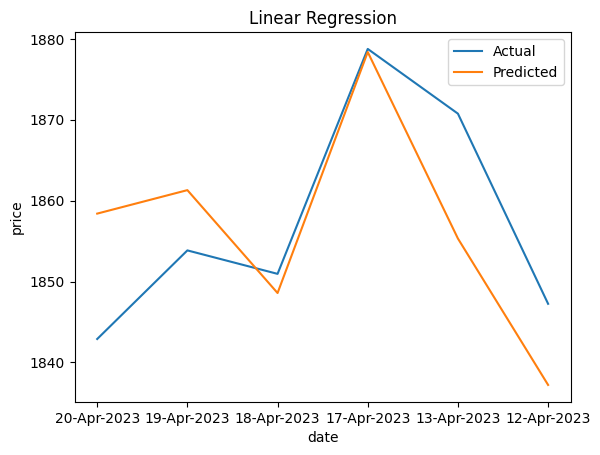

In [63]:
plt.plot(out['Date '],out4,label='Actual')
plt.plot(out['Date '],model_lr.predict(out3),label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [64]:
print('Root Mean Square Error (Linear Regression):',mean_squared_error(y_true=out4, y_pred=pred, squared=False))
print('Mean Absolute Percentage Error (Linear Regression):',mean_absolute_percentage_error(out4,pred))
print('Mean Bias Error (Linear Regression):',np.mean(out4 - pred))

Root Mean Square Error (Linear Regression): 10.328649786751626
Mean Absolute Percentage Error (Linear Regression): 0.004597864888100665
Mean Bias Error (Linear Regression): 0.8774650515889562


# Random Forest Regressor

In [65]:
pred_rf=model_rf.predict(out3)
pred_rf

array([1871.6385, 1864.6765, 1876.654 , 1879.432 , 1867.461 , 1840.1305])

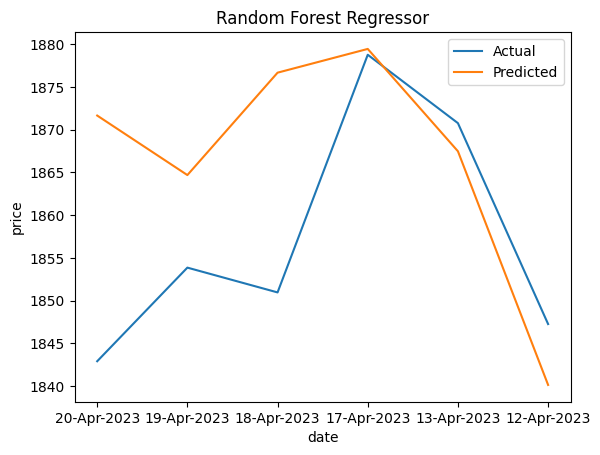

In [66]:
plt.plot(out['Date '],out4,label='Actual')
plt.plot(out['Date '],model_rf.predict(out3),label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()

In [67]:
print('Root Mean Square Error (Random Forest Regressor):',mean_squared_error(y_true=out4, y_pred=pred_rf, squared=False))
print('Mean Absolute Percentage Error (Random Forest Regressor):',mean_absolute_percentage_error(out4,pred_rf))
print('Mean Bias Error (Random Forest Regressor):',np.mean(out4 - pred_rf))

Root Mean Square Error (Random Forest Regressor): 16.6622328723278
Mean Absolute Percentage Error (Random Forest Regressor): 0.006882722828024296
Mean Bias Error (Random Forest Regressor): -9.257083333333602


# ANN

In [68]:
pred_ann=model_ann.predict(out3)
pred_ann

1/1 [==============================] - 0s 44ms/step


array([[1513.145 ],
       [1507.5162],
       [1507.9009],
       [1513.198 ],
       [1494.1027],
       [1463.2131]], dtype=float32)

1/1 [==============================] - 0s 52ms/step


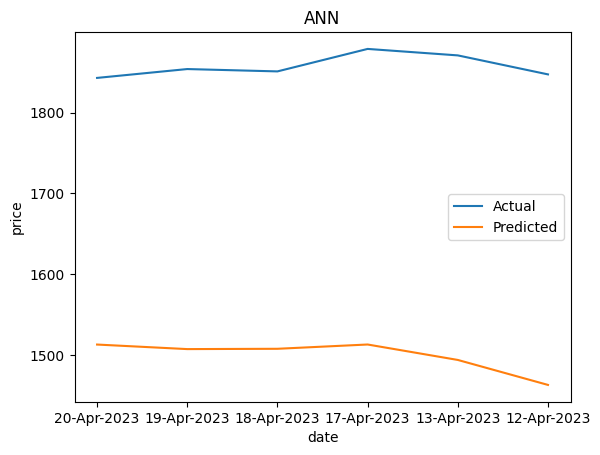

In [69]:
plt.plot(out['Date '],out4,label='Actual')
plt.plot(out['Date '],model_ann.predict(out3),label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('ANN')
plt.legend()
plt.show()

In [70]:
m1 = tf.keras.metrics.RootMeanSquaredError()
m1.update_state(out4,pred_ann)
rmse_test=m1.result().numpy()

n1 = tf.keras.metrics.MeanAbsolutePercentageError()
n1.update_state(out4,pred_ann)
mape_test=n1.result().numpy()


In [71]:
print('Root Mean Square Error (ANN):',rmse_test)
print('Mean Absolute Percentage Error (ANN):',mape_test)
print('Mean Bias Error (ANN):',np.mean(np.squeeze(out4) - np.squeeze(pred_ann)))

Root Mean Square Error (ANN): 358.08377
Mean Absolute Percentage Error (ANN): 19.248192
Mean Bias Error (ANN): 357.5623453776041
